In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
covid_df = pd.read_csv(r"C:/Users/hp/Downloads/covid 19/Latest Covid-19 India Status.csv")

In [3]:
covid_df.head()

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
0,Andaman and Nicobar,10747,0,10618,129,0.0,98.80,1.20,100896618
1,Andhra Pradesh,2339078,7,2324338,14733,0.0,99.37,0.63,128500364
2,Arunachal Pradesh,66891,0,66595,296,0.0,99.56,0.44,658019
3,Assam,746100,0,738065,8035,0.0,98.92,1.08,290492
4,Bihar,851404,1,839100,12303,0.0,98.55,1.45,40100376


In [4]:
covid_df.shape

(36, 9)

In [5]:
covid_df.columns

Index(['State/UTs', 'Total Cases', 'Active', 'Discharged', 'Deaths',
       'Active Ratio', 'Discharge Ratio', 'Death Ratio', 'Population'],
      dtype='object')

In [6]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State/UTs        36 non-null     object 
 1   Total Cases      36 non-null     int64  
 2   Active           36 non-null     int64  
 3   Discharged       36 non-null     int64  
 4   Deaths           36 non-null     int64  
 5   Active Ratio     36 non-null     float64
 6   Discharge Ratio  36 non-null     float64
 7   Death Ratio      36 non-null     float64
 8   Population       36 non-null     int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 2.7+ KB


In [7]:
covid_df.describe()

,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
count,3.600000e+01,36.000000,3.600000e+01,36.000000,36.000000,36.000000,36.000000,3.600000e+01
mean,1.241145e+06,56.527778,1.226346e+06,14742.388889,0.002222,98.893333,1.103889,3.971861e+07
std,1.834031e+06,215.847762,1.808252e+06,27170.089767,0.007601,0.498764,0.498479,5.050913e+07
min,1.074700e+04,0.000000,1.061800e+04,4.000000,0.000000,97.540000,0.030000,6.600100e+04
25%,1.058650e+05,0.000000,1.048640e+05,1120.750000,0.000000,98.672500,0.842500,1.695473e+06
50%,6.127720e+05,7.500000,6.063570e+05,6542.000000,0.000000,98.925000,1.070000,2.410088e+07
75%,1.320822e+06,27.500000,1.311256e+06,14292.750000,0.000000,99.150000,1.327500,6.979986e+07
max,8.136945e+06,1300.000000,7.988392e+06,148419.000000,0.040000,99.970000,2.460000,2.315026e+08


### Data Cleaning

In [8]:
# check if there are any null values present in the dataset
covid_df.isnull().sum()

State/UTs          0
Total Cases        0
Active             0
Discharged         0
Deaths             0
Active Ratio       0
Discharge Ratio    0
Death Ratio        0
Population         0
dtype: int64

In [9]:
# To check if there are any duplicate values
covid_df.duplicated().sum()

0

In [10]:
# To get the unique values in the State/UT column
covid_df["State/UTs"].unique()

array(['Andaman and Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra and Nagar Haveli and Daman and Diu', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telengana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

In [11]:
covid_df["State/UTs"].nunique()

36

### Exploratory Data Analysis

### Find the state that has minimum number of Total Cases and deaths

In [12]:
covid_df[covid_df['Total Cases'] == covid_df['Total Cases'].min()]

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
0,Andaman and Nicobar,10747,0,10618,129,0.0,98.8,1.2,100896618


In [13]:
covid_df[covid_df['Deaths'] == covid_df['Deaths'].min()]


,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
7,Dadra and Nagar Haveli and Daman and Diu,11591,0,11587,4,0.0,99.97,0.03,231502578


### Find the state with the maximum number of Total Cases and deaths

In [14]:
covid_df[covid_df['Total Cases'] == covid_df['Total Cases'].max()]

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
20,Maharashtra,8136945,134,7988392,148419,0.0,98.17,1.82,399001


In [15]:
covid_df[covid_df['Deaths'] == covid_df['Deaths'].max()]

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
20,Maharashtra,8136945,134,7988392,148419,0.0,98.17,1.82,399001


### Top 10 States with highest number of deaths

In [16]:
Top_10_death_states = covid_df[["State/UTs","Deaths"]].sort_values(by="Deaths",ascending =False)[:10]
Top_10_death_states

,State/UTs,Deaths
20,Maharashtra,148419
16,Kerala,71570
15,Karnataka,40308
30,Tamil Nadu,38049
8,Delhi,26522
33,Uttar Pradesh,23634
35,West Bengal,21532
27,Punjab,19289
1,Andhra Pradesh,14733
6,Chhattisgarh,14146


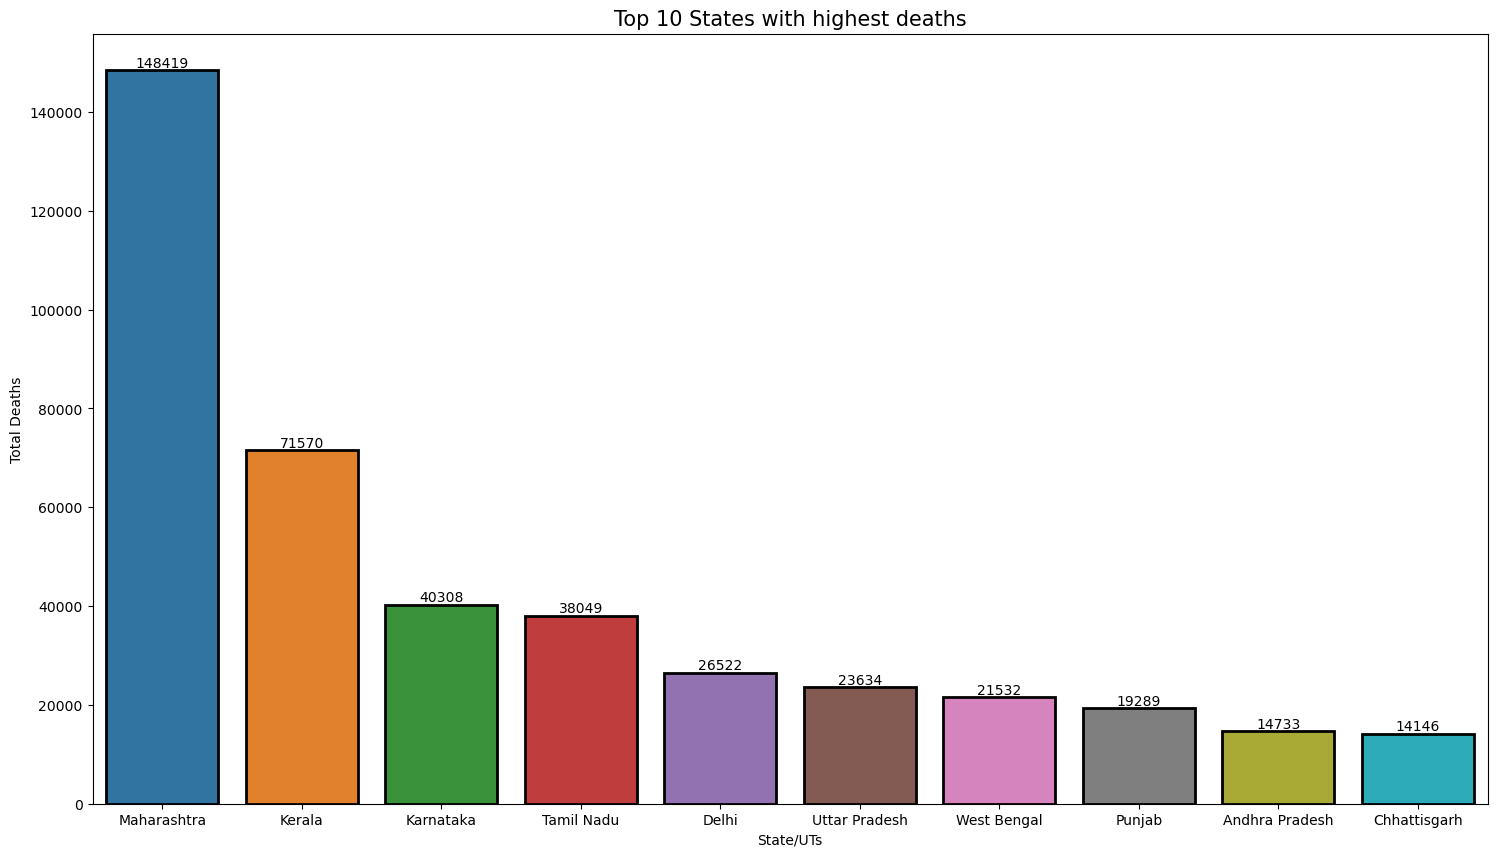

In [17]:
fig = plt.figure(figsize=(18,10))
plt.title("Top 10 States with highest deaths", size =15)
ax = sns.barplot(x="State/UTs", y= "Deaths", data = Top_10_death_states.iloc[:10], linewidth = 2, edgecolor ="k" )
plt.xlabel("State/UTs")
plt.ylabel("Total Deaths")
for i in ax.containers:
    ax.bar_label(i)
plt.show()


### Top 10 States with highest number of active cases

In [18]:
Top_10_activecases_states = covid_df[["State/UTs","Active"]].sort_values(by="Active",ascending =False)[:10]
Top_10_activecases_states

,State/UTs,Active
16,Kerala,1300
20,Maharashtra,134
15,Karnataka,123
25,Odisha,84
26,Puducherry,73
30,Tamil Nadu,58
35,West Bengal,50
11,Haryana,38
27,Punjab,29
31,Telengana,27


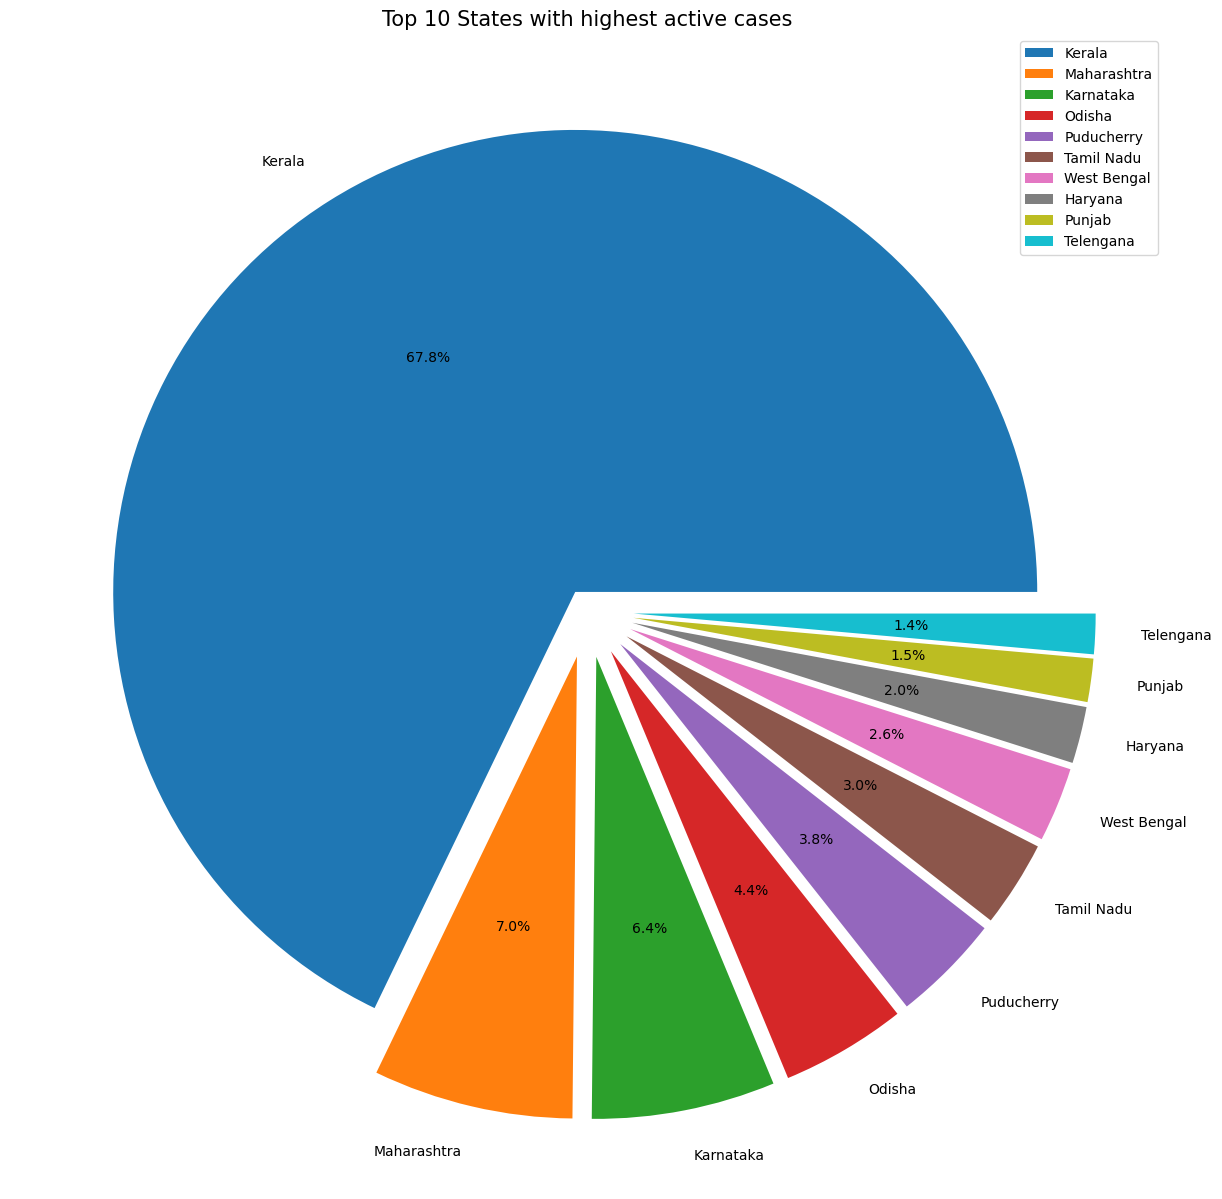

In [19]:
x = Top_10_activecases_states["Active"]
y = Top_10_activecases_states["State/UTs"]
fig = plt.figure(figsize = (20,15))
plt.title("Top 10 States with highest active cases", size = 15)
plt.pie(x, labels = y, startangle = 0, autopct = "%2.1f%%", explode = [0.05,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])
plt.legend(Top_10_activecases_states["State/UTs"])
plt.show()

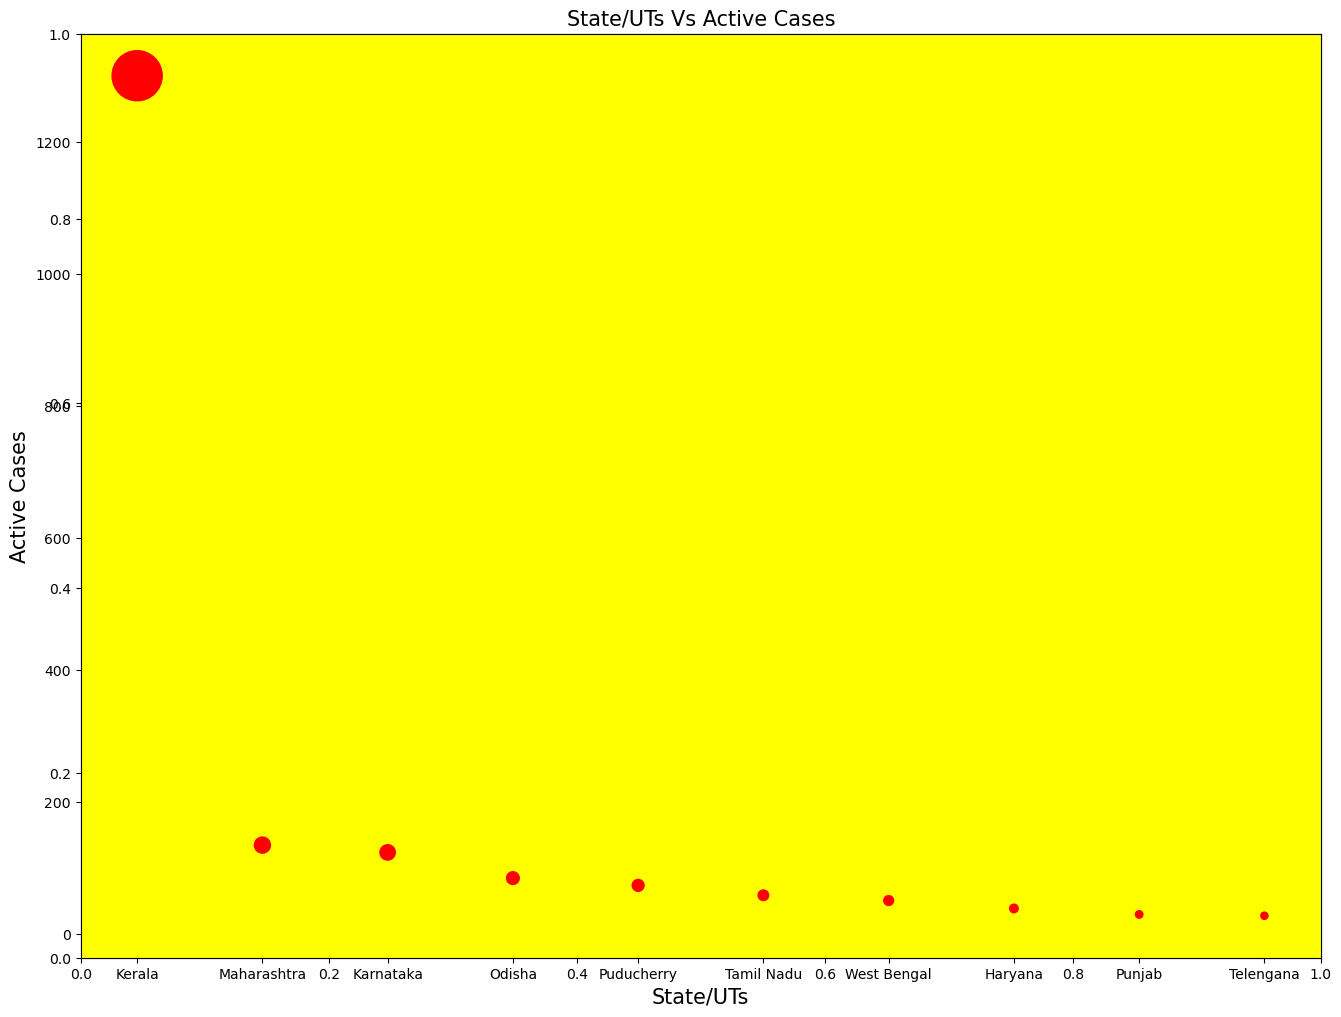

In [20]:
x = Top_10_activecases_states["State/UTs"]
y = Top_10_activecases_states["Active"]
fig = plt.figure(figsize = (16,12))
plt.title("State/UTs Vs Active Cases", size = 15)
ax=plt.axes()
ax.set_facecolor('yellow')
plt.scatter(x,y,color = "red", s= y)
plt.xlabel("State/UTs", size =15)
plt.ylabel("Active Cases",size =15)
plt.show()

### Top 10 States with lowest active cases

In [24]:
Lowest_activecases_states = covid_df[["State/UTs","Active"]].sort_values(by="Active")[:10]
Lowest_activecases_states

,State/UTs,Active
0,Andaman and Nicobar,0
32,Tripura,0
2,Arunachal Pradesh,0
3,Assam,0
24,Nagaland,0
23,Mizoram,0
7,Dadra and Nagar Haveli and Daman and Diu,0
21,Manipur,0
18,Lakshadweep,0
14,Jharkhand,0


### State/UTs Vs Maximum Total number of Cases

In [31]:
Total_cases = covid_df[["State/UTs","Total Cases"]].sort_values(by="Total Cases", ascending = False)[:10]
Total_cases

,State/UTs,Total Cases
20,Maharashtra,8136945
16,Kerala,6829249
15,Karnataka,4072536
30,Tamil Nadu,3594573
1,Andhra Pradesh,2339078
33,Uttar Pradesh,2128154
35,West Bengal,2118696
8,Delhi,2007313
25,Odisha,1336595
28,Rajasthan,1315564


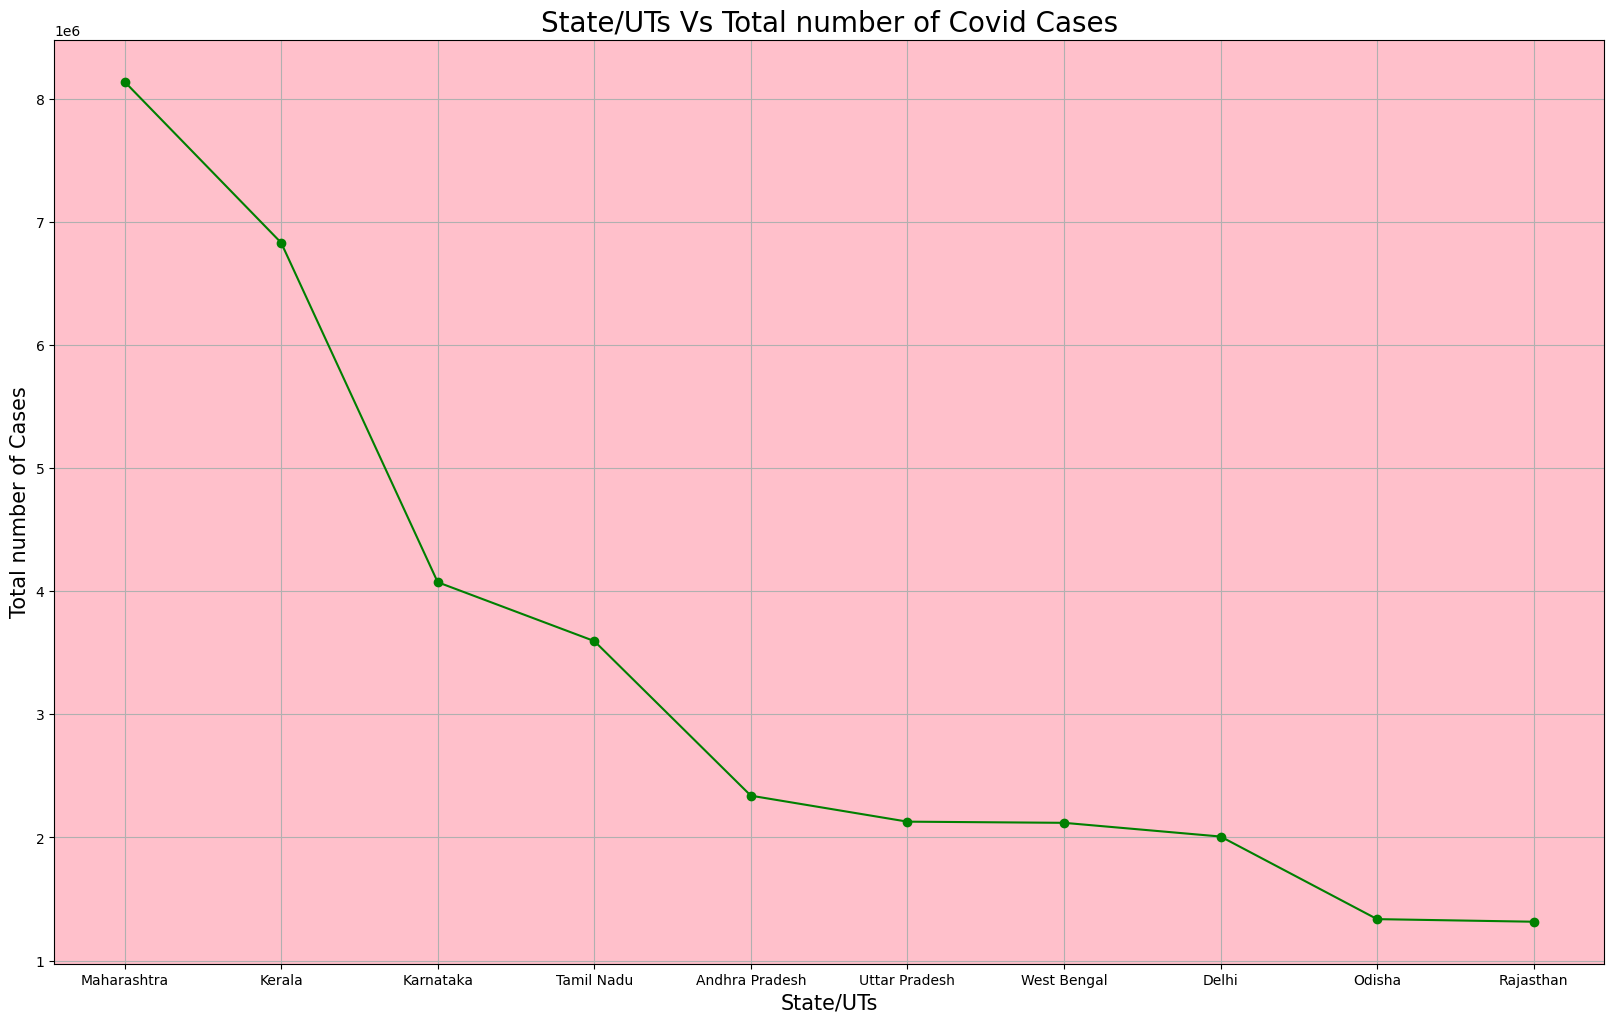

In [42]:
x = Total_cases["State/UTs"]
y = Total_cases["Total Cases"]
fig = plt.figure(figsize = (20,12))
ax=plt.axes()
ax.set_facecolor('pink')
plt.plot(x,y,color="Green",marker="o")
plt.xlabel("State/UTs",size = 15)
plt.ylabel("Total number of Cases", size =15)
plt.title("State/UTs Vs Total number of Covid Cases",size = 20)
plt.grid(True)
plt.show()

### Active Cases Vs Confirmed Cases

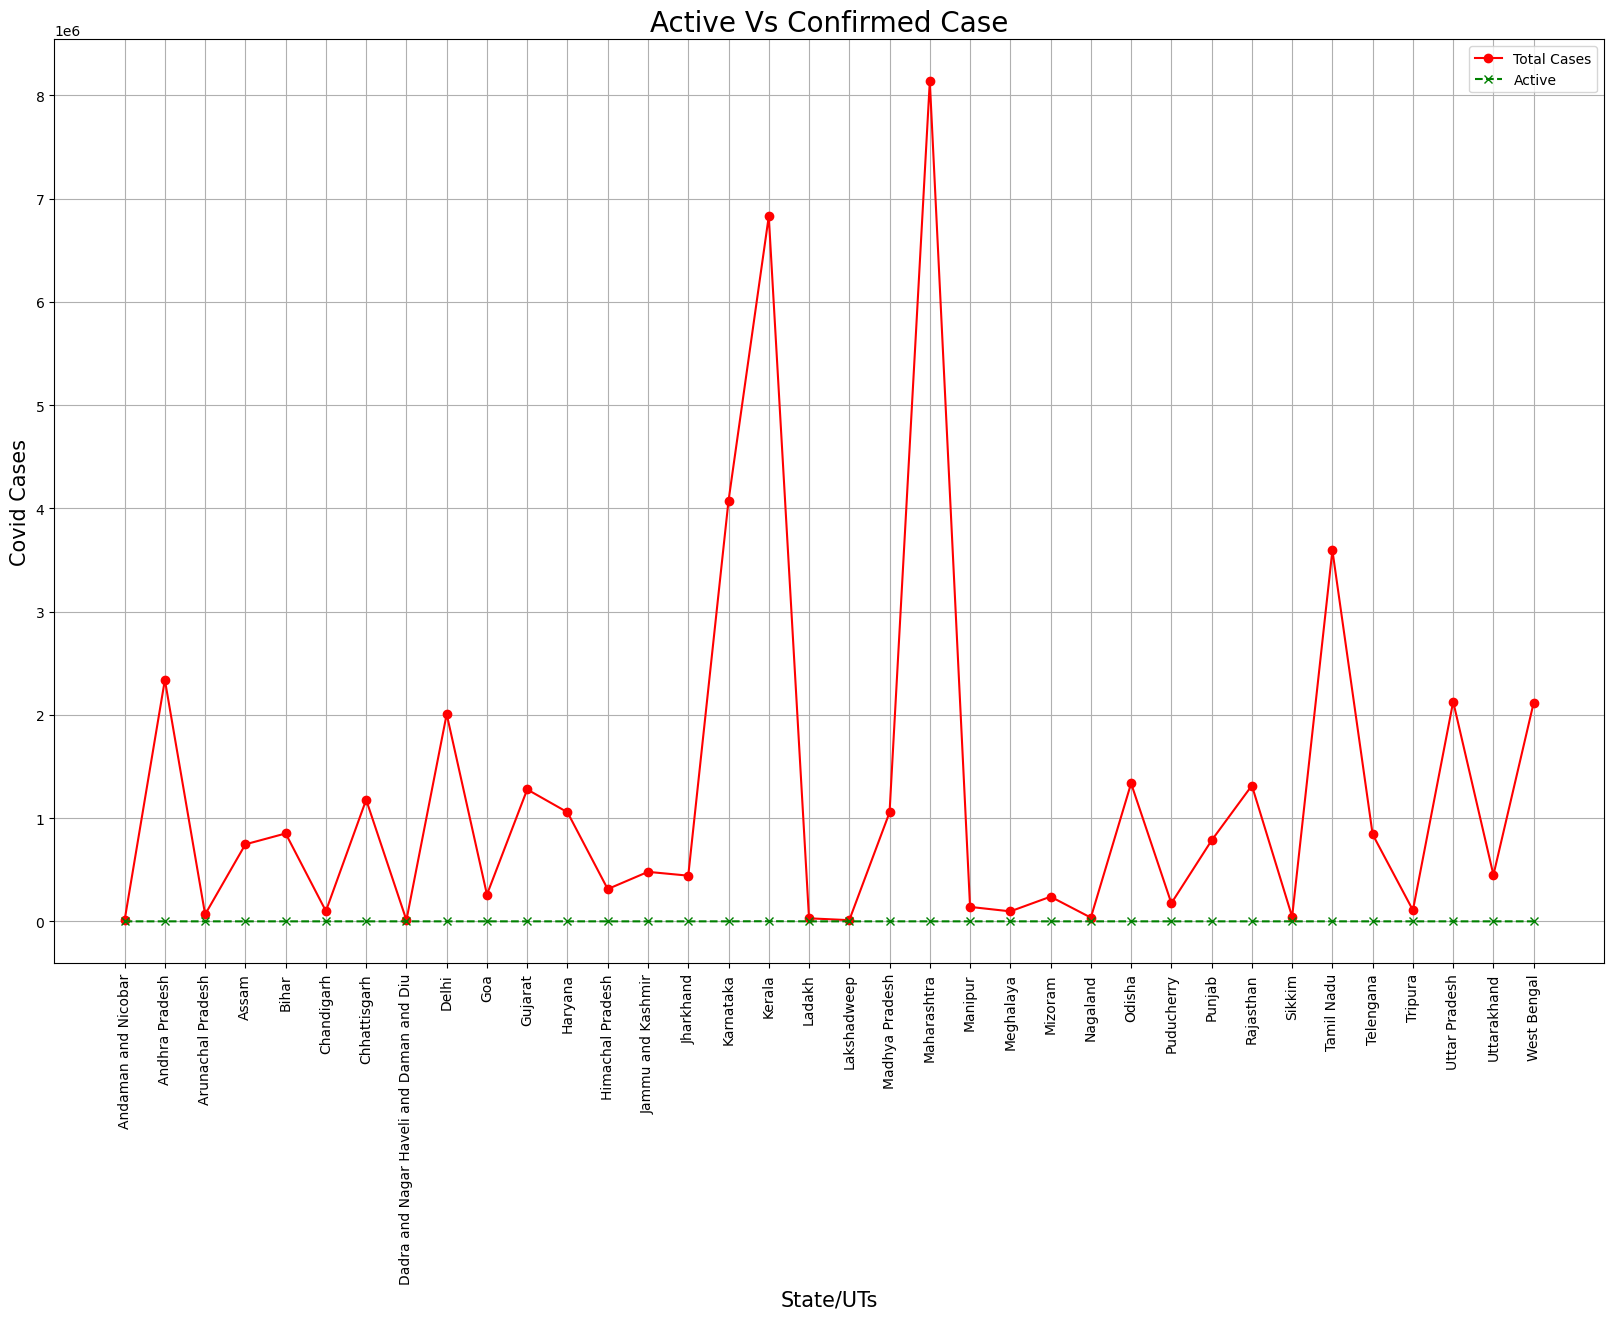

In [52]:
x = covid_df["State/UTs"].values
y1 = covid_df["Total Cases"].values
y2 = covid_df["Active"].values
fig = plt.figure(figsize = (20,12))
plt.plot(x,y1,color="Red",marker="o",linestyle = "-",label="Total Cases")
plt.plot(x,y2,color="Green",marker="x",linestyle="--",label="Active")
plt.xlabel("State/UTs",size = 15)
plt.ylabel("Covid Cases", size =15)
plt.title("Active Vs Confirmed Case",size = 20)
plt.xticks(rotation = 90)
plt.legend()
plt.grid(True)
plt.show()

### Deaths Vs Confirmed Cases

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


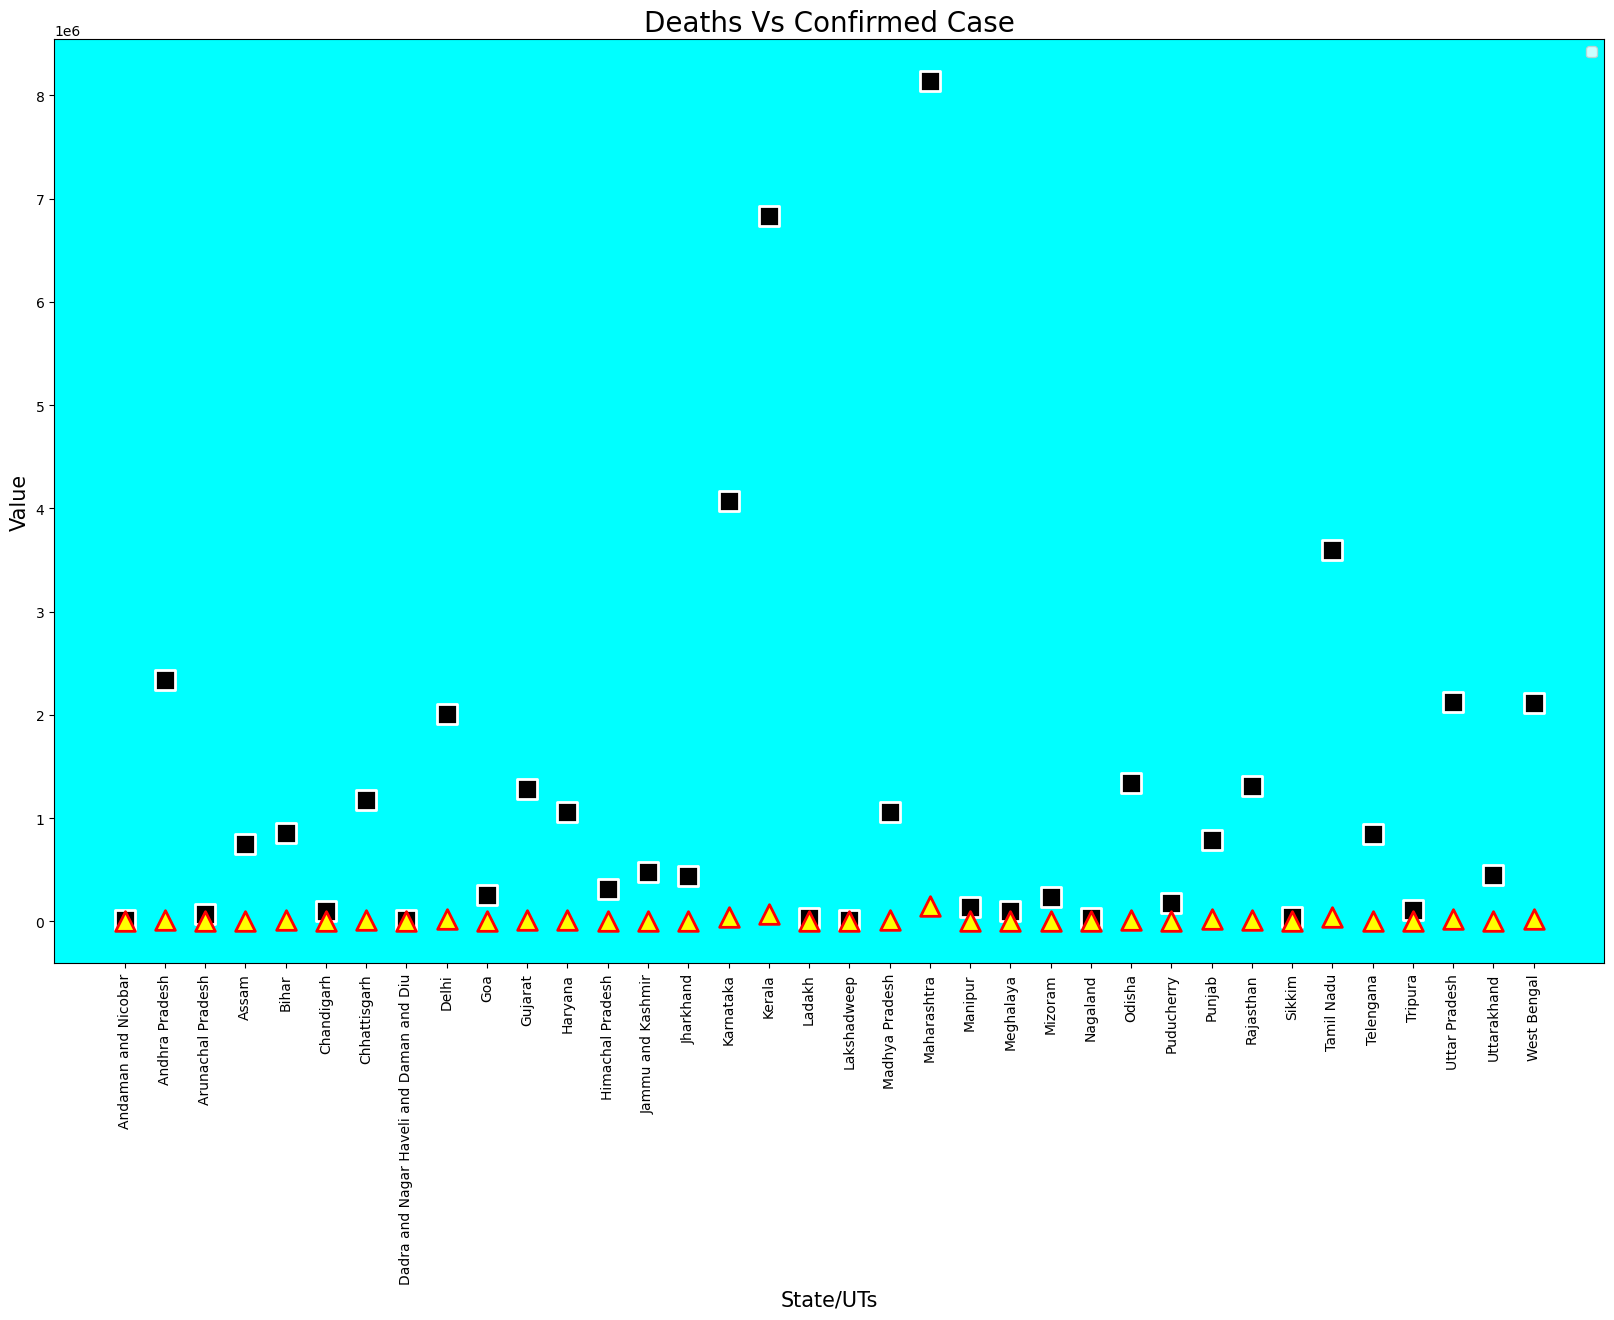

In [68]:
x = covid_df["State/UTs"].values
y1 = covid_df["Total Cases"].values
y2 = covid_df["Deaths"].values
fig = plt.figure(figsize = (20,12))
ax=plt.axes()
ax.set_facecolor('cyan')
plt.scatter(x, y1, c ="black", linewidths = 2,marker ="s",edgecolor ="white",s = 200)
plt.scatter(x, y2, c ="yellow",linewidths = 2,marker ="^",edgecolor ="red",s = 200)
plt.xlabel("State/UTs",size = 15)
plt.ylabel("Value", size =15)
plt.title("Deaths Vs Confirmed Case",size = 20)
plt.xticks(rotation = 90)
plt.legend()
plt.show()


### Histograms for death ratio

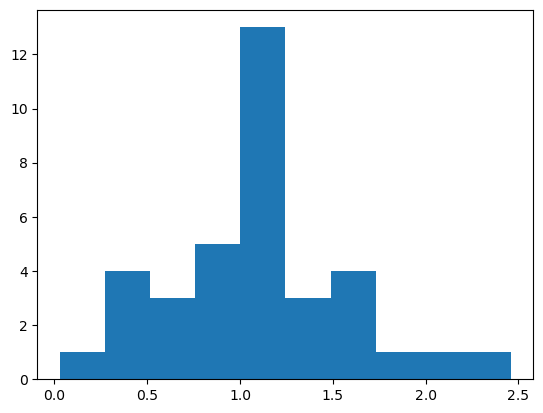

In [76]:
x = covid_df["Death Ratio"].values
plt.hist(x)
plt.show()

### Horizontal bar graph representing State/UTs Vs Death ratio

In [96]:
Highest_death_ratio = covid_df[["State/UTs","Death Ratio"]].sort_values(by="Death Ratio",ascending = False)[:5]
Highest_death_ratio 

,State/UTs,Death Ratio
27,Punjab,2.46
24,Nagaland,2.17
20,Maharashtra,1.82
34,Uttarakhand,1.73
22,Meghalaya,1.68


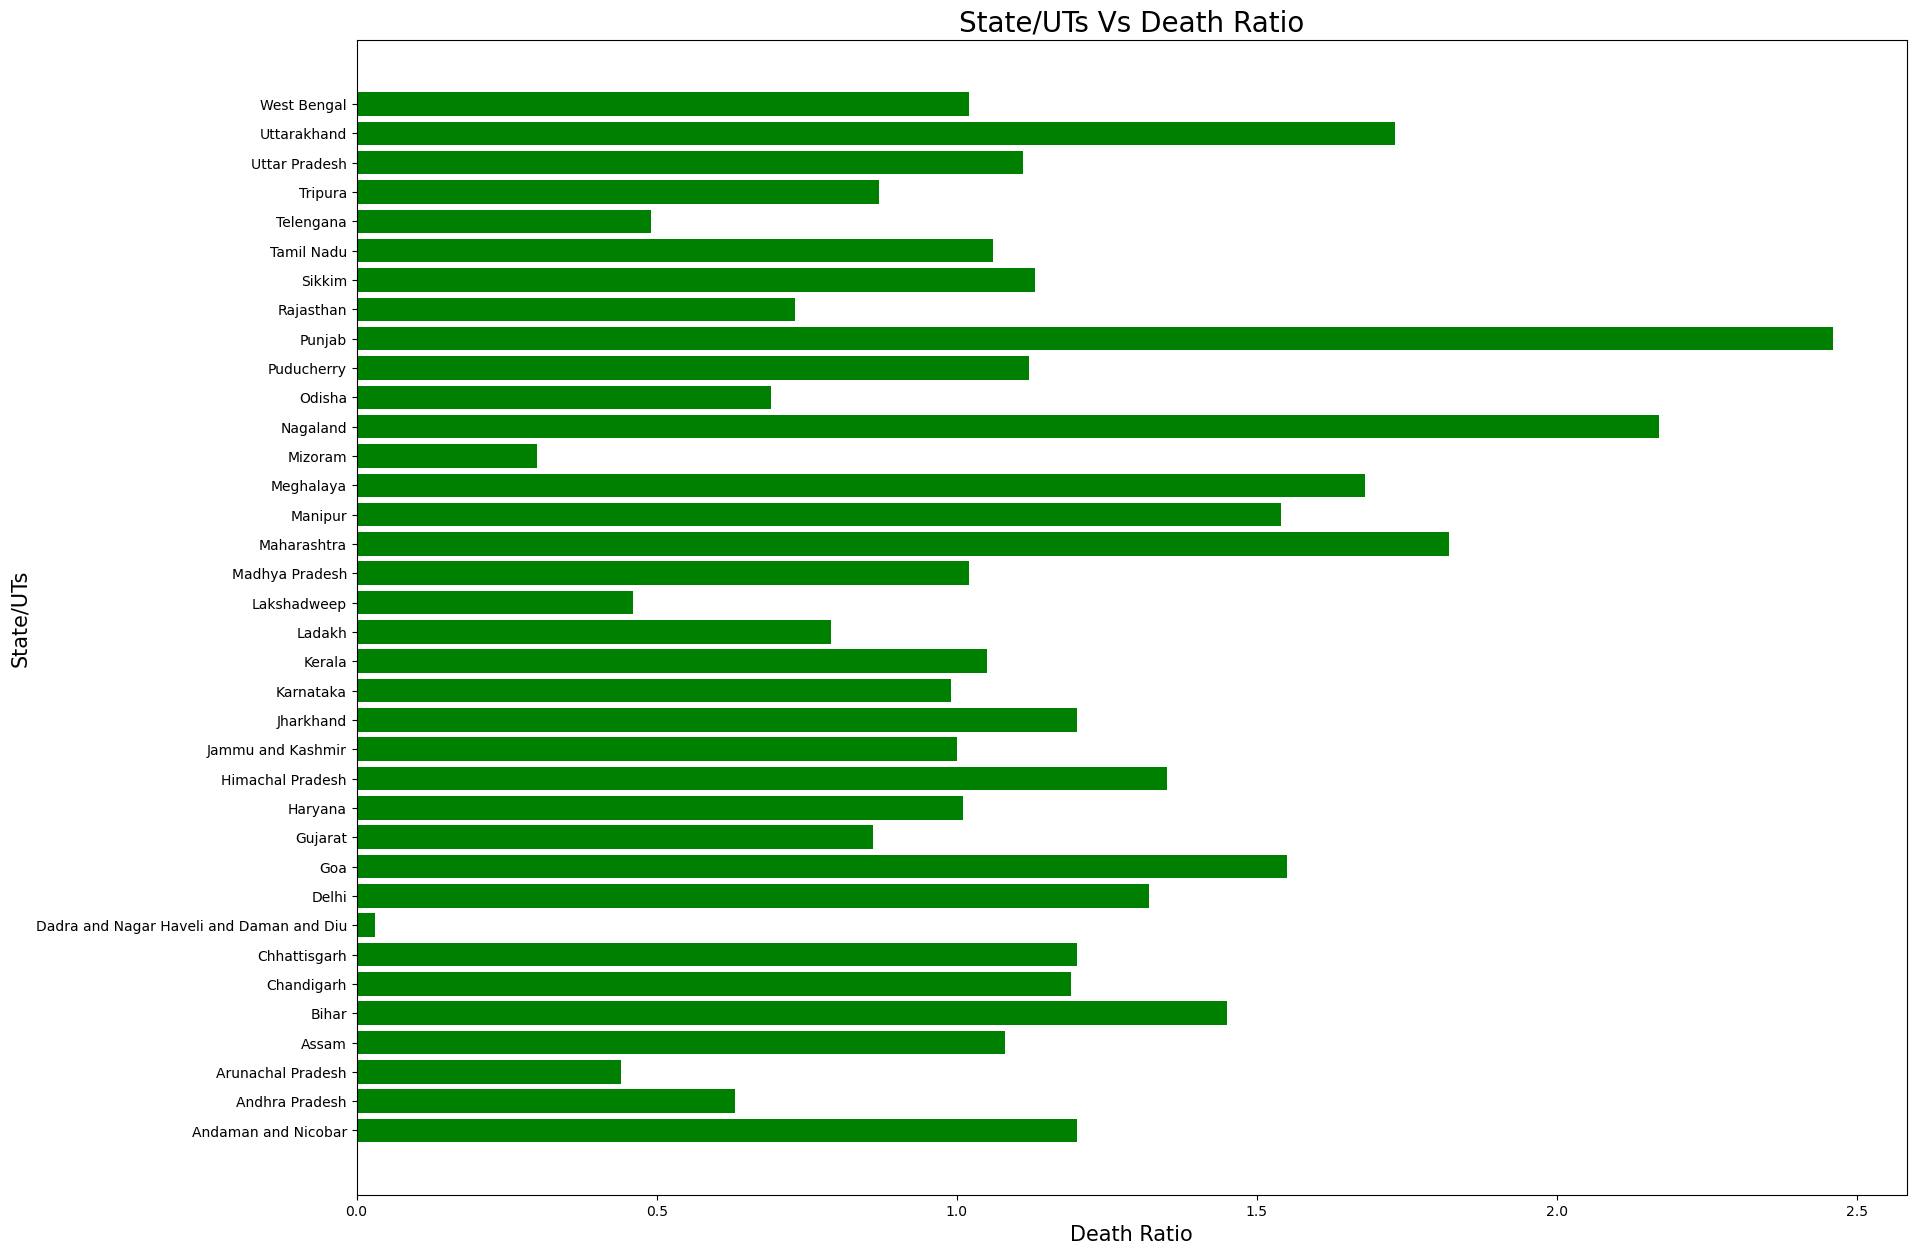

In [91]:
y = covid_df["State/UTs"].values
x = covid_df["Death Ratio"].values
fig = plt.figure(figsize = (20,15))
plt.barh(y,x, color = "green")
plt.xlabel("Death Ratio",size = 15)
plt.ylabel("State/UTs", size =15)
plt.title("State/UTs Vs Death Ratio",size = 20)
plt.show()

### Conclusion
From the above EDA, we have found the below results:
1. Maharashtra is the state that has the maximum number of covid cases and also deaths.
2. Andaman and Nicobar has the least number of covid cases.
3. Dadra and Nagar Haveli and Daman and Diu has the lowest number of deaths.
4. Kerala has the highest number of active cases.
5. Punjab and Nagaland have the highest death ratio. 